In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("results.json")
df = df.rename(columns={'filters_coeff': 'filters coefficient', 'n_filters': 'filters',
                        'kernel_size': 'kernel size', 'n_epochs': 'epochs', 
                        'zero_one_loss': 'zero one loss'},)
df.head()

,filters coefficient,filters,kernel size,epochs,zero one loss
0,same,16,3,10,455
1,same,16,3,15,486
2,same,16,3,20,486
3,same,16,5,10,567
4,same,16,5,15,497


### Loss over the epochs used for training

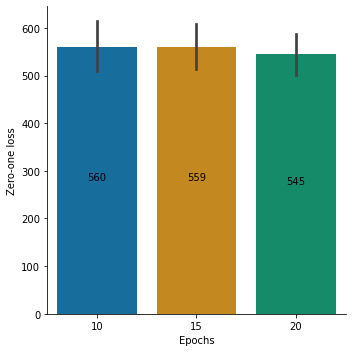

In [3]:
g = sns.catplot(data=df, x='epochs', y='zero one loss', kind='bar', palette='colorblind',)
g.set_axis_labels('Epochs', 'Zero-one loss')

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [round(df.groupby('epochs')['zero one loss'].mean().values[i]) for i,v in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
    
plt.show()

### Loss over the number of filters used in the Conv2D layers

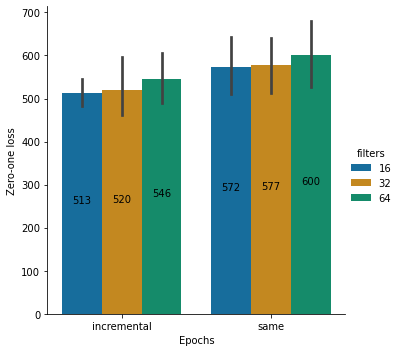

In [4]:
g = sns.catplot(data=df, x='filters coefficient', y='zero one loss', kind='bar', palette='colorblind', hue='filters', order=['incremental','same'])
g.set_axis_labels('Epochs', 'Zero-one loss')

ax = g.facet_axis(0, 0)
for i, c in enumerate(ax.containers):
    labels = [round(df.groupby(['filters', 'filters coefficient'])['zero one loss']
                    .mean().values[i*len(list(c))+j])
              for j,_ in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
    
plt.show()

### Loss over the size of the kernel used in the Conv2D layer

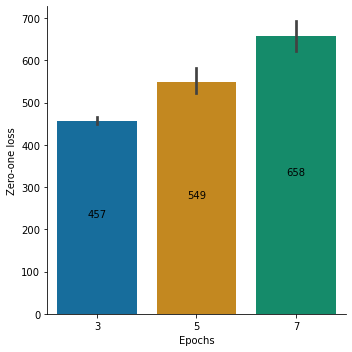

In [5]:
g = sns.catplot(data=df, x='kernel size', y='zero one loss', kind='bar', palette='colorblind',)
g.set_axis_labels('Epochs', 'Zero-one loss')

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [round(df.groupby(['kernel size'])['zero one loss'].mean().values[i])
              for i,_ in enumerate(c)]
    ax.bar_label(c, labels=labels, label_type='center', padding=3)
    
plt.show()